In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
from utils import FunctionAlignExperiment
import seaborn as sns
from numpy import median
from scipy.stats import median_test, f_oneway

In [4]:
exp = FunctionAlignExperiment()

In [56]:
exp.run_experiment(participant='will', N_var=4, N_trials=20, dummy=True)

FunctionBasicExperiment(experiment='{"trials": [{"program": "def e(a, n, w, x):\\n    return x - n - a - w\\n\…

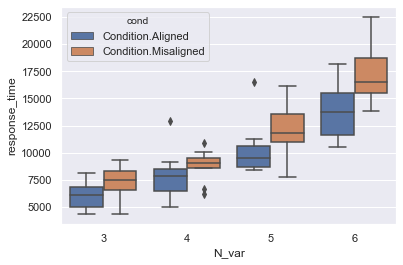

In [29]:
sns.boxplot(
    data=exp.results(), x='N_var', y='response_time', hue='cond', hue_order=list(map(str, exp.Condition)))

In [32]:
rt = exp.results().groupby(['N_var', 'cond']).median().response_time
print(rt.loc[:,'Condition.Misaligned'] / rt.loc[:,'Condition.Aligned'])

N_var
3    1.221894
4    1.154726
5    1.246136
6    1.198770
Name: response_time, dtype: float64


In [54]:
exp.results().groupby(['N_var']).apply(
    lambda data: median_test(data[data.cond == 'Condition.Aligned'].response_time, 
                             data[data.cond == 'Condition.Misaligned'].response_time)[1])

N_var
3    0.179712
4    0.025347
5    0.025347
6    0.179712
dtype: float64